In [95]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [104]:
#reading the text file
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()[3:]
    
    x = [int(line.split()[0]) for line in lines]
    y = [line.split()[1] for line in lines]
    z = [float(line.split()[2]) for line in lines]

In [105]:
#function
#def f_line(x,a,b):
    #return a*np.exp(-1*b*x**2)

def f_line(t, A, omega, phi, C):
    return A* np.sin(omega * t + phi) + C
    
#convert strings to floats 
def convert_strings_to_floats(input_array):
    output_array = []
    for element in input_array:
        converted_float = float(element)
        output_array.append(converted_float)
    return output_array
    
#replace char ':' with '.'
bad_chars = [';', ':', '!', "*", " "]
    
for i in range(len(y)):
    for j in bad_chars:
       y[i]= y[i].replace(j, '.')

#convert y into floats
y = convert_strings_to_floats(y)

params, parmas_cov = optimize.curve_fit(f_line,x,y, p0 = 1.0, sigma=0.25)

fit_curve = f_line(x, *params)

ValueError: `sigma` has incorrect shape.

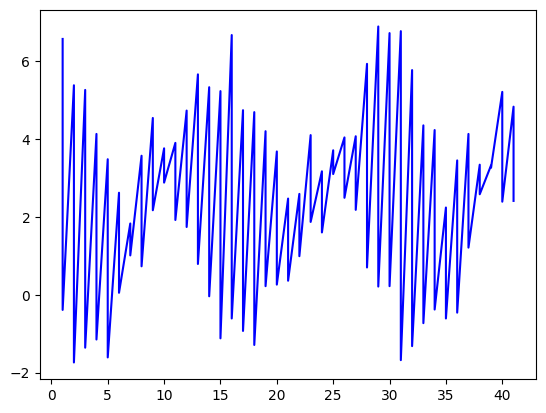

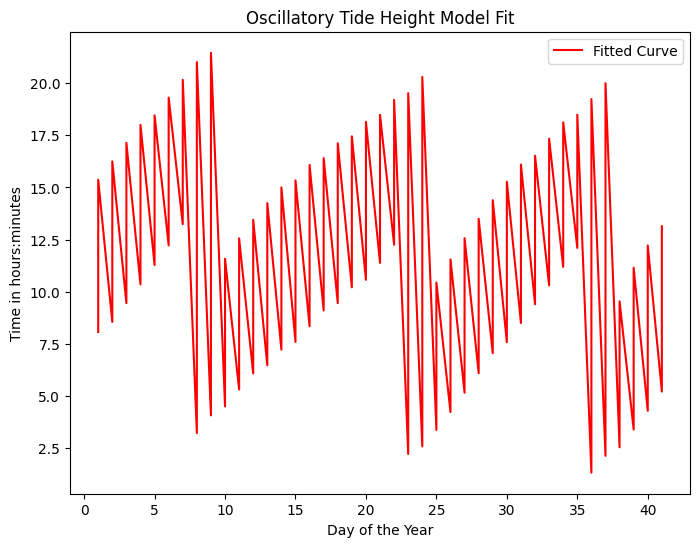

In [106]:
plt.plot(x,z, label='Data', color='blue')

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
#plt.errorbar(x, y, yerr=0.25, fmt='o', label='Data with Error Bars')
plt.plot(x, y, label='Fitted Curve', color='red')

# Add labels and title
plt.xlabel("Day of the Year")
plt.ylabel("Time in hours:minutes")
plt.title('Oscillatory Tide Height Model Fit')
plt.legend()

#save the figure as a PDF
plt.savefig("group_prj_plot.PDF", bbox_inches="tight",facecolor="blue")

# Show the plot
plt.show()